1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 772ms/step


E0000 00:00:1734163270.455027    5774 meta_optimizer.cc:966] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'functional_1/up_sampling2d_1_1/Repeat/ExpandDims' exist for missing node 'functional_1/add_2_1/Add'.


0


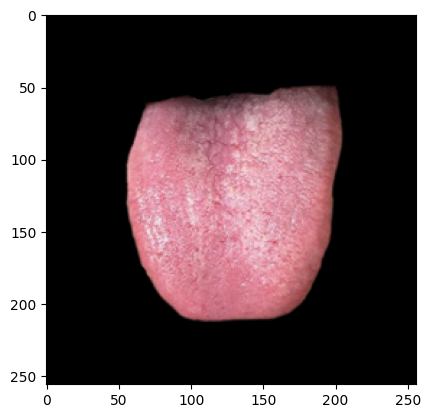

In [6]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

%matplotlib inline

weight_path:str = './weight/unet_v3.model.keras'

# 加载模型
model = load_model(weight_path)

def process_img(img_path:str):
    img = Image.open(img_path)
    img = img.convert('RGB')
    img = img.resize((256, 256))
    img = np.array(img)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    return img

def predict_img(img_path:str):
    img = process_img(img_path)
    result = model.predict(img)
    result = np.squeeze(result, axis=0)
    result = np.argmax(result, axis=-1)
    result = result.astype(np.uint8)
    return result

# 展示图片
file_path:str = './0.png'
img = process_img(file_path)
plt.imshow(img[0])

# 预测图片
result = predict_img(file_path)
print(result)